In [4]:
from sklearn.cluster import KMeans
import os
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pth
from PIL.Image import *
from matplotlib import cm
from PIL import Image
import cv2
from PIL import Image

# Kmeans

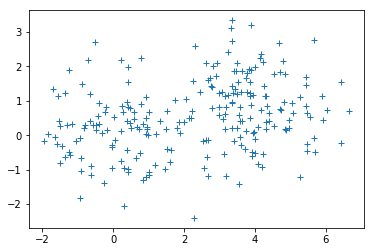

In [2]:
"""some points (do not look the way we generate them)"""
points=np.concatenate([np.random.normal(size=[100,2]),np.random.normal(size=[130,2])+np.array([4,1])])
plt.plot(points[:,0],points[:,1],"+");

In [3]:
"""creation of the algo"""
kmeans=KMeans(n_clusters=K)
"""computation of centroids"""
kmeans.fit(points)
"""here is the result"""
kmeans.cluster_centers_

array([[ 3.15090994,  1.1738936 ],
       [-0.01627983,  0.10595834],
       [ 4.74092393,  0.42163516]])

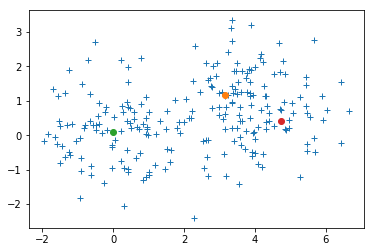

In [4]:
"""let's plot points and centroid"""
plt.plot(points[:,0],points[:,1],"+");
for centroid in kmeans.cluster_centers_:
    plt.plot(centroid[0],centroid[1],"o")

In [5]:
labels = kmeans.predict(points)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

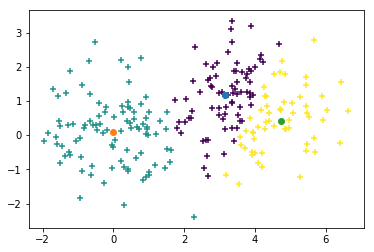

In [6]:
plt.scatter(points[:,0],points[:,1],c=labels,marker="+")
for centroid in kmeans.cluster_centers_:
    plt.plot(centroid[0],centroid[1],"o")

In [7]:
"""we generate some points regularly placed"""
x=np.linspace(-2,6,20)
XX,YY=np.meshgrid(x,x)
XX=XX.flatten()
YY=YY.flatten()
other_points=np.stack([XX,YY],axis=1)
other_points.shape

(400L, 2L)

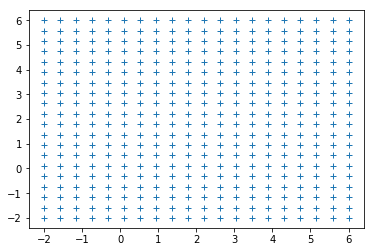

In [8]:
plt.plot(other_points[:,0],other_points[:,1],'+');

In [9]:
labels = kmeans.predict(other_points)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,

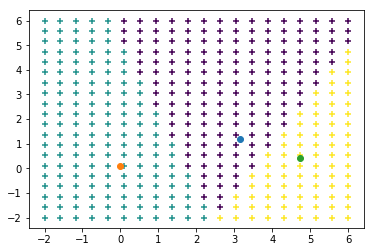

In [10]:
plt.scatter(other_points[:,0],other_points[:,1],c=labels,marker="+")
for centroid in kmeans.cluster_centers_:
    plt.plot(centroid[0],centroid[1],"o");